### Library import

In [25]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
# Common imports
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
Workflow_ID = "end_to_end_COVID-19_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", Workflow_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [26]:
# Getting the dataset
df = pd.read_csv("master_dataset.csv")

In [27]:
df.head()

,region,country,sex,age,bmi,blood_type,smoking,alcohol,cannabis,amphetamines,...,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,prescription_medication,opinion_infection,opinion_mortality,risk_infection,risk_mortality
0,NaN,CA,male,20_30,27.7,bn,NaN,NaN,NaN,NaN,...,0,0,0,0,0,NaN,NaN,NaN,9.0,0.500
1,NaN,CA,male,80_90,27.7,an,NaN,NaN,NaN,NaN,...,1,1,0,1,0,NaN,NaN,NaN,9.0,64.824
2,NaN,CA,female,30_40,21.6,unknown,NaN,NaN,NaN,NaN,...,0,0,0,0,0,NaN,NaN,NaN,9.0,0.500
3,NaN,CA,male,60_70,32.4,unknown,NaN,NaN,NaN,NaN,...,0,1,0,1,0,NaN,NaN,NaN,9.0,21.658
4,NaN,CA,female,50_60,29.7,unknown,NaN,NaN,NaN,NaN,...,0,0,0,0,1,NaN,NaN,NaN,9.0,12.061


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682793 entries, 0 to 682792
Data columns (total 37 columns):
region                       72575 non-null object
country                      682774 non-null object
sex                          682793 non-null object
age                          682793 non-null object
bmi                          682793 non-null float64
blood_type                   682793 non-null object
smoking                      680940 non-null object
alcohol                      680940 non-null float64
cannabis                     669293 non-null float64
amphetamines                 652870 non-null float64
cocaine                      651007 non-null float64
lsd                          655151 non-null float64
mdma                         659180 non-null float64
contacts_count               678561 non-null float64
house_count                  682793 non-null int64
text_working                 678561 non-null object
rate_government_action       682793 non-null int64


In [29]:
df.describe(include='all')

,region,country,sex,age,bmi,blood_type,smoking,alcohol,cannabis,amphetamines,...,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,prescription_medication,opinion_infection,opinion_mortality,risk_infection,risk_mortality
count,72575,682774,682793,682793,682793.000000,682793,680940,680940.000000,669293.000000,652870.000000,...,682793.000000,682793.000000,682793.000000,682793.000000,682793.000000,210009,562221.000000,562221.000000,682790.000000,682790.000000
unique,5,176,3,11,NaN,9,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,60827,NaN,NaN,NaN,NaN
top,SA,US,female,30_40,NaN,unknown,never,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,LEVOTHYROXINE SODIUM,NaN,NaN,NaN,NaN
freq,29919,573247,467721,219007,NaN,224051,387680,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11030,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,29.830236,NaN,NaN,2.731708,2.405111,-0.720591,...,0.012581,0.059639,0.003232,0.129749,0.074556,NaN,36.329139,21.301348,55.674408,3.646769
std,NaN,NaN,NaN,NaN,7.967037,NaN,NaN,4.198964,8.104987,1.957915,...,0.111456,0.236817,0.056762,0.336028,0.262673,NaN,22.195624,21.752944,24.140232,6.993820
min,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,-1.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,5.000000,5.000000,9.000000,0.500000
25%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,0.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,15.000000,5.000000,36.000000,0.500000
50%,NaN,NaN,NaN,NaN,28.300000,NaN,NaN,1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,35.000000,15.000000,50.000000,0.500000
75%,NaN,NaN,NaN,NaN,34.000000,NaN,NaN,4.000000,0.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,55.000000,35.000000,75.000000,2.329000


### Data cleaning

In [30]:
df.isnull().sum()

region                       610218
country                          19
sex                               0
age                               0
bmi                               0
blood_type                        0
smoking                        1853
alcohol                        1853
cannabis                      13500
amphetamines                  29923
cocaine                       31786
lsd                           27642
mdma                          23613
contacts_count                 4232
house_count                       0
text_working                   4232
rate_government_action            0
rate_reducing_risk_single         0
rate_reducing_risk_house          0
rate_reducing_mask             1853
covid19_positive                  0
covid19_symptoms                  0
covid19_contact                   0
asthma                            0
kidney_disease                    0
compromised_immune                0
heart_disease                     0
lung_disease                

In [31]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

df['smoking'] = df['smoking'].fillna(df['smoking'].mode()[0])

df['text_working'] = df['text_working'].fillna(df['text_working'].mode()[0])

# Filling Missing observations in Continuous variables in the dataset:
df['rate_reducing_mask'].fillna(df['rate_reducing_mask'].mean(), inplace=True)
#df['bmi'].fillna(df['bmi'].mean(), inplace=True)

df['alcohol'].fillna(df['alcohol'].mean(), inplace=True)
df['cannabis'].fillna(df['cannabis'].mean(), inplace=True)
df['amphetamines'].fillna(df['amphetamines'].mean(), inplace=True)
df['lsd'].fillna(df['lsd'].mean(), inplace=True)
df['mdma'].fillna(df['mdma'].mean(), inplace=True)
df['cocaine'].fillna(df['cocaine'].mean(), inplace=True)
df['contacts_count'].fillna(df['contacts_count'].mean(), inplace=True)
df['lung_disease'].fillna(df['lung_disease'].mean(), inplace=True)
df['diabetes'].fillna(df['diabetes'].mean(), inplace=True)
df['hiv_positive'].fillna(df['hiv_positive'].mean(), inplace=True)
df['hypertension'].fillna(df['hypertension'].mean(), inplace=True)
df['other_chronic'].fillna(df['other_chronic'].mean(), inplace=True)
df['opinion_infection'].fillna(df['opinion_infection'].mean(), inplace=True)
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

df['opinion_mortality'].fillna(df['opinion_mortality'].mean(), inplace=True)
df['risk_infection'].fillna(df['risk_infection'].mean(), inplace=True)
df['risk_mortality'].fillna(df['risk_mortality'].mean(), inplace=True)
df['heart_disease'].fillna(df['heart_disease'].mean(), inplace=True)

In [32]:
column2drop = ['region', 'prescription_medication', 'opinion_mortality', 'risk_mortality']
df.drop(column2drop, axis=1, inplace=True)

In [33]:
df.head()

,country,sex,age,bmi,blood_type,smoking,alcohol,cannabis,amphetamines,cocaine,...,kidney_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,opinion_infection,risk_infection
0,CA,male,20_30,27.7,bn,never,2.731708,2.405111,-0.720591,-0.795096,...,0,0,0,0,0,0,0,0,36.329139,9.0
1,CA,male,80_90,27.7,an,never,2.731708,2.405111,-0.720591,-0.795096,...,0,1,0,1,1,0,1,0,36.329139,9.0
2,CA,female,30_40,21.6,unknown,never,2.731708,2.405111,-0.720591,-0.795096,...,0,0,0,0,0,0,0,0,36.329139,9.0
3,CA,male,60_70,32.4,unknown,never,2.731708,2.405111,-0.720591,-0.795096,...,0,0,0,0,1,0,1,0,36.329139,9.0
4,CA,female,50_60,29.7,unknown,never,2.731708,2.405111,-0.720591,-0.795096,...,0,1,0,0,0,0,0,1,36.329139,9.0


#### Feature Engineering

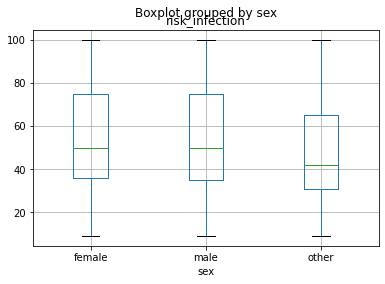

In [34]:
df.boxplot(['risk_infection'], by='sex', showfliers=True)
plt.show()

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


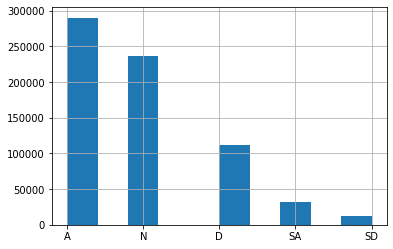

In [35]:
df.rate_government_action[df.rate_government_action == -2] = "SD"
df.rate_government_action[df.rate_government_action == -1] = "D"
df.rate_government_action[df.rate_government_action == 0] = "N"
df.rate_government_action[df.rate_government_action == 1] = "A"
df.rate_government_action[df.rate_government_action == 2] = "SA"

df["rate_government_action"].hist()

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

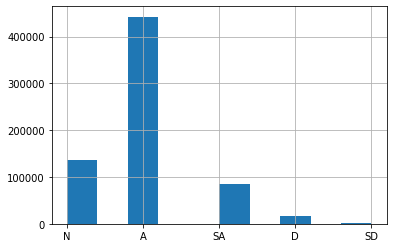

In [36]:
df.rate_reducing_risk_house[df.rate_reducing_risk_house == -2] = "SD"
df.rate_reducing_risk_house[df.rate_reducing_risk_house == -1] = "D"
df.rate_reducing_risk_house[df.rate_reducing_risk_house == 0] = "N"
df.rate_reducing_risk_house[df.rate_reducing_risk_house == 1] = "A"
df.rate_reducing_risk_house[df.rate_reducing_risk_house == 2] = "SA"
df["rate_reducing_risk_house"].hist()

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


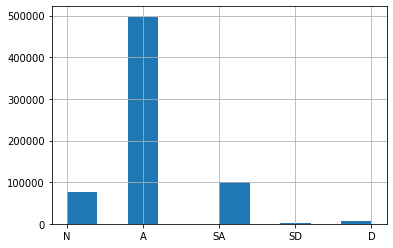

In [37]:
df.rate_reducing_risk_single[df.rate_reducing_risk_single == -2] = "SD"
df.rate_reducing_risk_single[df.rate_reducing_risk_single == -1] = "D"
df.rate_reducing_risk_single[df.rate_reducing_risk_single == 0] = "N"
df.rate_reducing_risk_single[df.rate_reducing_risk_single == 1] = "A"
df.rate_reducing_risk_single[df.rate_reducing_risk_single == 2] = "SA"
df["rate_reducing_risk_single"].hist()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682793 entries, 0 to 682792
Data columns (total 33 columns):
country                      682793 non-null object
sex                          682793 non-null object
age                          682793 non-null object
bmi                          682793 non-null float64
blood_type                   682793 non-null object
smoking                      682793 non-null object
alcohol                      682793 non-null float64
cannabis                     682793 non-null float64
amphetamines                 682793 non-null float64
cocaine                      682793 non-null float64
lsd                          682793 non-null float64
mdma                         682793 non-null float64
contacts_count               682793 non-null float64
house_count                  682793 non-null int64
text_working                 682793 non-null object
rate_government_action       682793 non-null object
rate_reducing_risk_single    682793 non-null objec

In [39]:
from sklearn.preprocessing import StandardScaler
df[['cannabis', 'cocaine', 'amphetamines', 'lsd', 'mdma']] = StandardScaler().fit_transform(df[['cannabis', 'cocaine', 'amphetamines', 'lsd', 'mdma']])

In [40]:
col = df.loc[: , 'cannabis':'mdma']
df['drugs_use'] = col.mean(axis=1)

In [41]:
column3drop = ['cannabis', 'amphetamines', 'cocaine', 'lsd', 'mdma']
df.drop(column3drop, axis=1, inplace=True)

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
df['risk_infection'] = pd.cut(df.risk_infection,bins=[0,34,67,100],labels=['Low','Medium','High'])
df['risk_infection']

0            Low
1            Low
2            Low
3            Low
4            Low
           ...  
682788      High
682789       Low
682790       Low
682791       Low
682792    Medium
Name: risk_infection, Length: 682793, dtype: category
Categories (3, object): [Low < Medium < High]

In [44]:
#df['bmi'] = pd.cut(df.bmi,bins=[0,18.5,24.9,29.9,39.9,145],labels=['Underweight','Healthy weight','Overweight','Obese',
                                                                 #'Class 3 Obese'])
#df['bmi']


In [45]:
#df['bmi'].value_counts()
#df['bmi'].value_counts()
#df['bmi'].value_counts()
#df['bmi'].value_counts()
#df['bmi'].value_counts().plot(kind='bar', 
                                   #title='BMI Distribution')
#plt.show()

In [46]:
label_encoders = dict()
label_encoders = dict()
column2encode = ['sex', 'age', 'country','blood_type', 'smoking', 
                'text_working', 'rate_government_action', 'rate_reducing_risk_single', 
                'rate_reducing_risk_house']

for col in column2encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

for col in column2encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

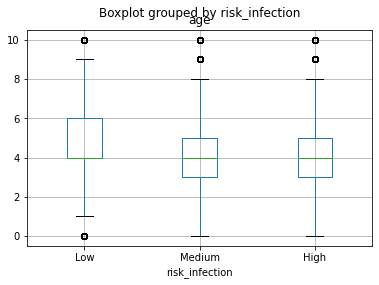

In [47]:
df.boxplot(['age'], by='risk_infection', showfliers=True)
plt.show()

In [48]:
df.isnull().sum()

country                      0
sex                          0
age                          0
bmi                          0
blood_type                   0
smoking                      0
alcohol                      0
contacts_count               0
house_count                  0
text_working                 0
rate_government_action       0
rate_reducing_risk_single    0
rate_reducing_risk_house     0
rate_reducing_mask           0
covid19_positive             0
covid19_symptoms             0
covid19_contact              0
asthma                       0
kidney_disease               0
compromised_immune           0
heart_disease                0
lung_disease                 0
diabetes                     0
hiv_positive                 0
hypertension                 0
other_chronic                0
opinion_infection            0
risk_infection               0
drugs_use                    0
dtype: int64

C:\Users\Hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.

Saving figure attribute_histogram_plots


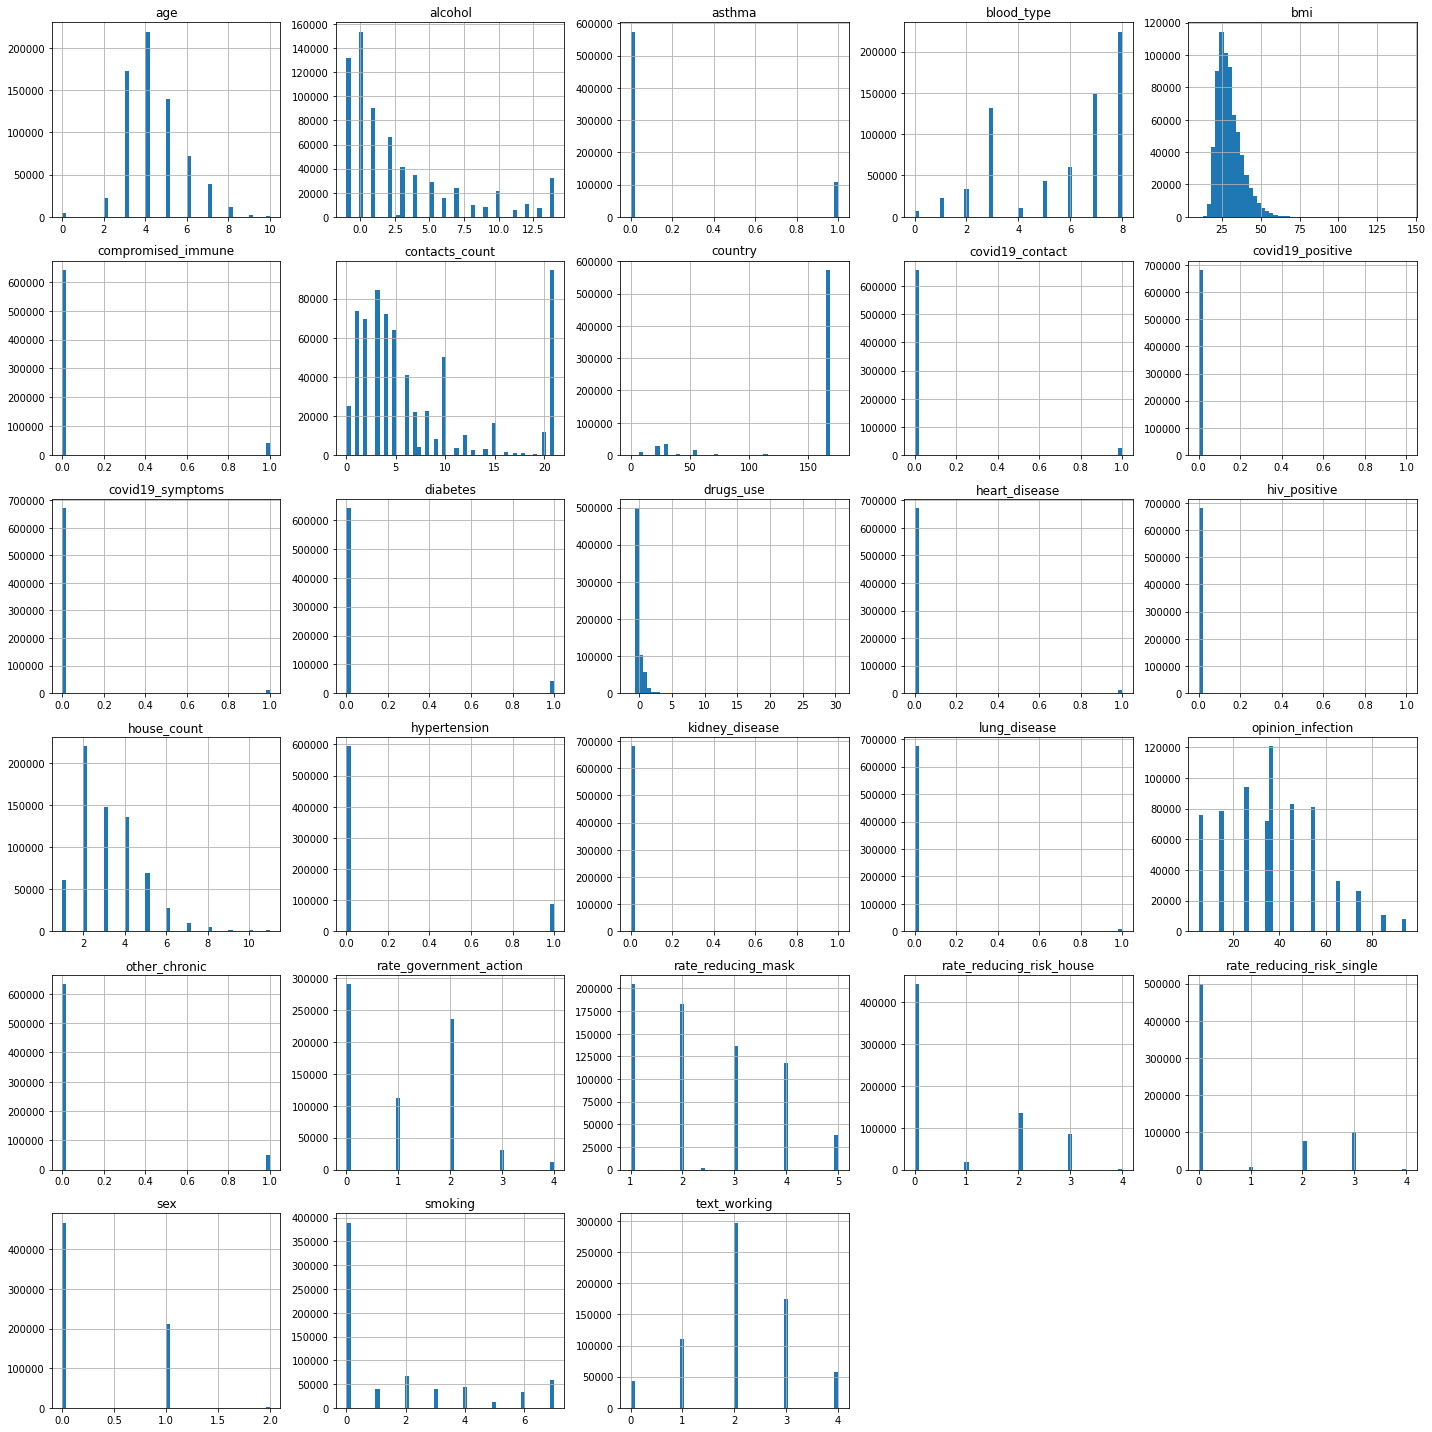

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,20))
save_fig("attribute_histogram_plots")
plt.show()

In [50]:
corr_matrix = df.corr()

In [51]:
#corr_matrix["risk_infection"].sort_values(ascending=False)

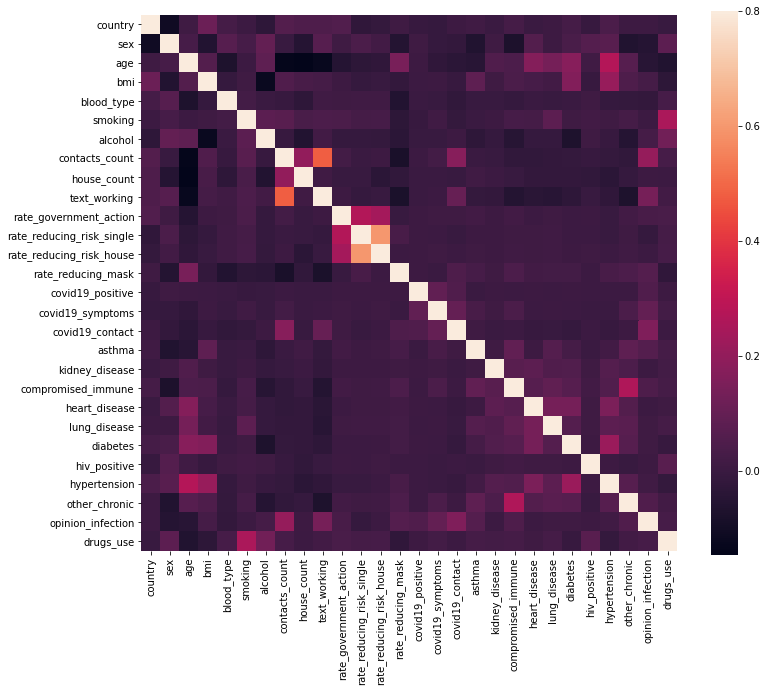

In [52]:
# Correlation matrix
import seaborn as sns

cor = df.corr()
fig = plt.figure(figsize = (12,10))
sns.heatmap(cor,vmax = 0.8, square = True)
plt.show()

In [53]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlations = df.corr(method='pearson')
print(correlations)

                             country    sex    age    bmi  blood_type  smoking  alcohol  \
country                    1.000e+00 -0.107  0.010  0.115       0.026    0.003   -0.030   
sex                       -1.069e-01  1.000  0.029 -0.060       0.068    0.029    0.096   
age                        1.038e-02  0.029  1.000  0.059      -0.069    0.003    0.084   
bmi                        1.146e-01 -0.060  0.059  1.000      -0.012    0.010   -0.123   
blood_type                 2.583e-02  0.068 -0.069 -0.012       1.000    0.022   -0.001   
smoking                    3.319e-03  0.029  0.003  0.010       0.022    1.000    0.078   
alcohol                   -3.012e-02  0.096  0.084 -0.123      -0.001    0.078    1.000   
contacts_count             6.086e-02 -0.003 -0.136  0.051      -0.007    0.069   -0.008   
house_count                4.679e-02 -0.051 -0.146  0.032      -0.029    0.039   -0.059   
text_working               4.903e-02  0.066 -0.126  0.025       0.017    0.046    0.018   

In [54]:
# We want to know how well does each feature correlate with the dependent variable
corr = df.corr() #method : {‘pearson’, ‘kendall’, ‘spearman’}

#Correlation with the variable covid19_positive
cor_target = (corr["risk_infection"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.0]
relevant_features

KeyError: 'risk_infection'

In [ ]:
columns = df[['country', 'bmi', 'contacts_count', 
                         'house_count', 'text_working', 'rate_government_action', 
                         'covid19_positive','covid19_symptoms', 'opinion_infection', 'drugs_use']]

In [ ]:
# We want to perform correlation on the selected columns
columns.corr() #method : {‘pearson’, ‘kendall’, ‘spearman’}

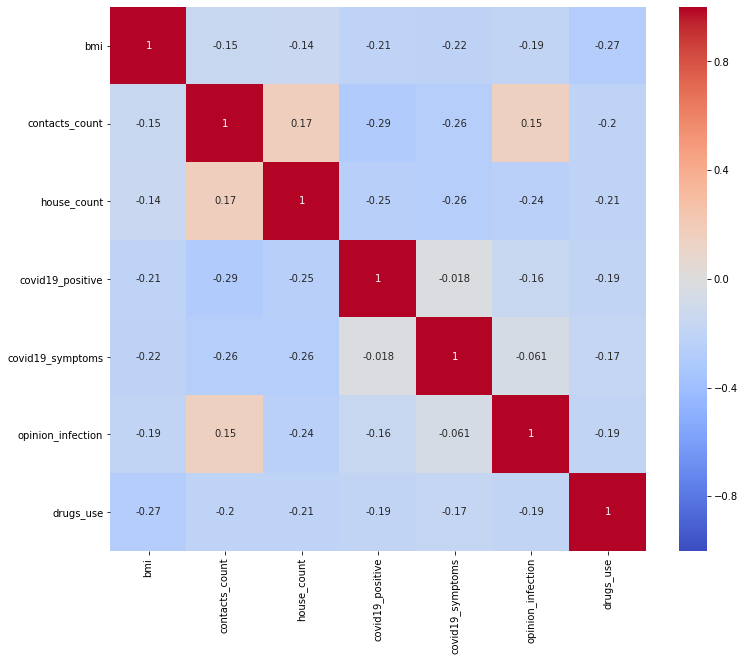

In [22]:
import seaborn as sns
correlation_matrix = columns.corr()
fig = plt.figure(figsize = (12,10))
sns.heatmap(correlation_matrix.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
#sns.heatmap(correlation_matrix.corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

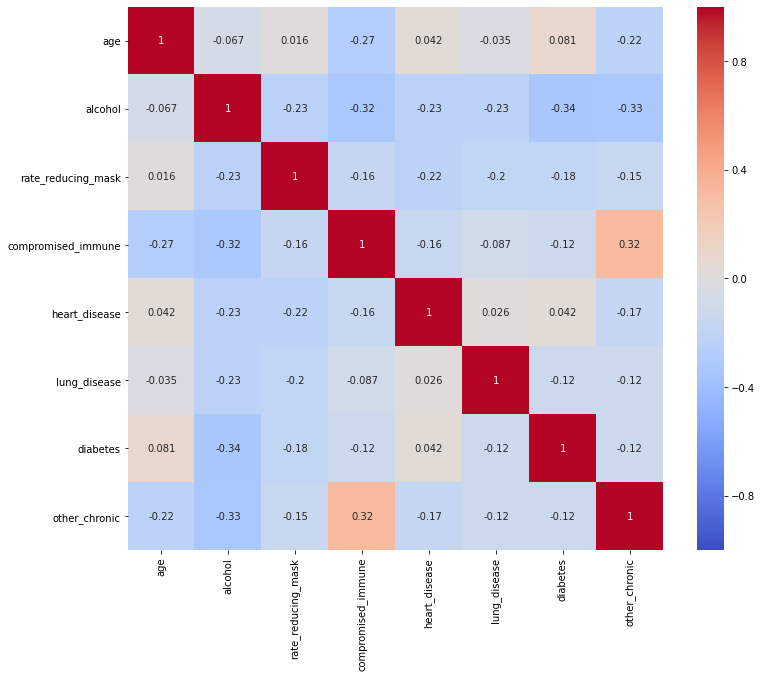

In [55]:
columns = df[['age', 'alcohol', 'rate_reducing_mask', 
                         'compromised_immune', 'heart_disease', 'lung_disease', 
                         'diabetes','other_chronic']]
columns.corr() 
correlation_matrix = columns.corr()
fig = plt.figure(figsize = (12,10))
sns.heatmap(correlation_matrix.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
#sns.heatmap(correlation_matrix.corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

In [23]:
print(df.columns)

Index(['country', 'sex', 'age', 'bmi', 'blood_type', 'smoking', 'alcohol',
       'contacts_count', 'house_count', 'text_working',
       'rate_government_action', 'rate_reducing_risk_single',
       'rate_reducing_risk_house', 'rate_reducing_mask', 'covid19_positive',
       'covid19_symptoms', 'covid19_contact', 'asthma', 'kidney_disease',
       'compromised_immune', 'heart_disease', 'lung_disease', 'diabetes',
       'hiv_positive', 'hypertension', 'other_chronic', 'opinion_infection',
       'risk_infection', 'drugs_use'],
      dtype='object')


In [56]:
from sklearn.preprocessing import StandardScaler
independent_variables = ['age', 'alcohol', 'country', 'bmi', 'smoking', 
       'contacts_count', 'house_count', 'text_working','compromised_immune',
       'rate_government_action',
       'rate_reducing_mask', 'covid19_positive','heart_disease', 'lung_disease', 'diabetes',
       'covid19_symptoms', 'covid19_contact',
       'other_chronic', 'opinion_infection','drugs_use']
# use the list to select a subset from original DataFrame
# Separating out the features
x = df.loc[:, independent_variables].values
#df['risk_infection'] = pd.cut(df.risk_infection,bins=[0,34,67,100],labels=['Low','Medium','High'])
# Separating out the target
y = df.loc[:,['risk_infection']].values
# Standardizing the features
X = StandardScaler().fit_transform(x)

#X = df[independent_variables]
#y = df['risk_infection']

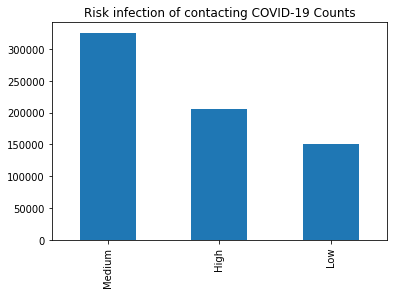

In [57]:
df['risk_infection'].value_counts()
df['risk_infection'].value_counts()
df['risk_infection'].value_counts().plot(kind='bar', 
                                   title='Risk infection of contacting COVID-19 Counts')
plt.show()

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal_component_1', 'principal_component_2', 'principal_component_3', 
                                      'principal_component_4', 'principal_component_5', 'principal_component_6', 
                                      'principal_component_7', 'principal_component_8', 'principal_component_9', 
                                      'principal_component_10'])

In [34]:
#df['risk_infection'].replace(0, 'High',inplace=True)
#df['risk_infection'].replace(1, 'Low',inplace=True)
#df['risk_infection'].replace(2, 'Medium',inplace=True)

In [59]:
df.head()

,country,sex,age,bmi,blood_type,smoking,alcohol,contacts_count,house_count,text_working,...,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,opinion_infection,risk_infection,drugs_use
0,28,1,3,27.7,4,0,2.732,7.369,4,2,...,0,0,0,0,0,0,0,36.329,Low,2.462e-16
1,28,1,9,27.7,2,0,2.732,7.369,4,2,...,1,0,1,1,0,1,0,36.329,Low,2.462e-16
2,28,0,4,21.6,8,0,2.732,7.369,2,2,...,0,0,0,0,0,0,0,36.329,Low,2.462e-16
3,28,1,7,32.4,8,0,2.732,7.369,5,2,...,0,0,0,1,0,1,0,36.329,Low,2.462e-16
4,28,0,6,29.7,8,0,2.732,7.369,2,2,...,1,0,0,0,0,0,1,36.329,Low,2.462e-16


In [60]:
finalDf = pd.concat([principalDf, df[['risk_infection']]], axis = 1)

In [61]:
finalDf.head()

,principal_component_1,principal_component_2,principal_component_3,principal_component_4,principal_component_5,principal_component_6,principal_component_7,principal_component_8,principal_component_9,principal_component_10,risk_infection
0,0.252,-1.276,-0.078,0.681,0.272,-0.793,1.894,0.337,0.318,-1.205,Low
1,-4.076,5.207,1.179,-0.143,-1.827,-2.413,3.482,1.720,-1.937,0.326,Low
2,-0.180,-1.237,0.437,1.203,0.040,-0.566,0.660,-0.353,-1.245,-1.612,Low
3,-1.315,1.145,-0.608,-0.380,-1.529,0.516,1.218,-0.032,0.169,-2.783,Low
4,-1.973,2.111,0.293,1.516,2.348,-3.105,1.619,-2.114,0.731,0.047,Low


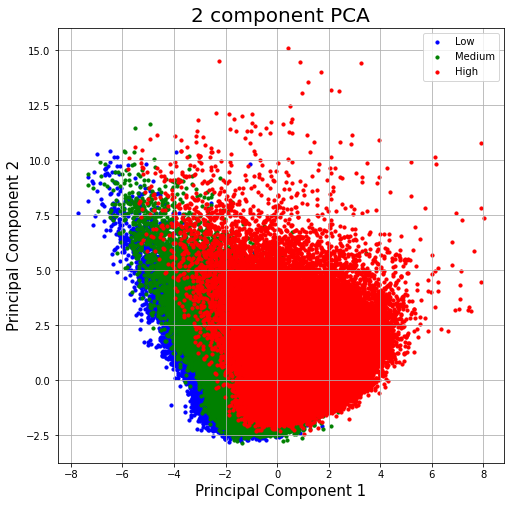

In [62]:
# Visualization of the PCA 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Low', 'Medium', 'High']
colors = ['b', 'g', 'r']
for risk_infection, color in zip(targets,colors):
    indicesToKeep = finalDf['risk_infection'] == risk_infection
    ax.scatter(finalDf.loc[indicesToKeep, 'principal_component_1']
               , finalDf.loc[indicesToKeep, 'principal_component_2']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

In [63]:
pca.explained_variance_ratio_

array([0.09344112, 0.07975004, 0.06830498, 0.06277782, 0.06000813,
       0.05324586, 0.05207095, 0.04982409, 0.04915668, 0.04715591])

In [64]:
# import the necessary packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

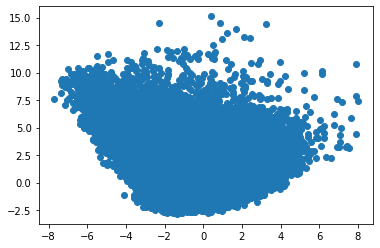

In [65]:
# Visualize true data points before the applications of K-means clustering 
plt.scatter(principalDf.iloc[:,0],principalDf.iloc[:,1], label='True Position')

In [66]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(principalDf)

In [67]:
km.labels_[:5]

array([0, 1, 0, 0, 1])

In [68]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2]), array([400056,  83104, 199633], dtype=int64))

C:\Users\Hp\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


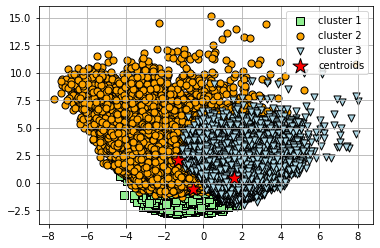

In [69]:
# plot the 3 clusters
plt.scatter(
    principalDf.iloc[y_km == 0, 0], principalDf.iloc[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1')

plt.scatter(
    principalDf.iloc[y_km == 1, 0], principalDf.iloc[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2')

plt.scatter(
    principalDf.iloc[y_km == 2, 0], principalDf.iloc[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3')

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

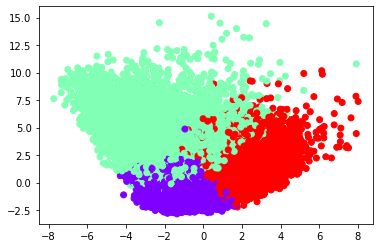

In [70]:
# Visualize the data points after applying the k-means clustering  
plt.scatter(principalDf.iloc[:,0],principalDf.iloc[:,1], c=km.labels_, cmap='rainbow')

In [71]:
# Performing Centering of the k-means 
km.cluster_centers_

array([[-0.5116816 , -0.62494629, -0.00992534,  0.00652024, -0.02781072,
         0.2368112 , -0.05377759,  0.0676221 ,  0.05778699, -0.08215605],
       [-1.31046502,  2.01724589,  0.26087924,  0.06260339,  1.10622108,
        -0.8967911 ,  0.26770137, -0.30421606, -0.23837187,  0.41433606],
       [ 1.57046333,  0.41224216, -0.08870488, -0.03911913, -0.40473858,
        -0.10110351, -0.00369966, -0.00883494, -0.01653995, -0.00788656]])

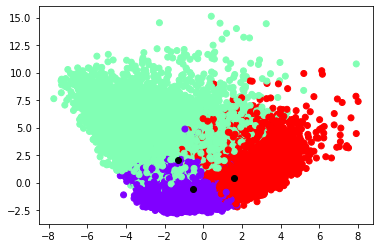

In [72]:
# Visualising the clusters after centering 
#Plot the centroid. This time we're going to use the cluster centres  

plt.scatter(principalDf.iloc[:,0], principalDf.iloc[:,1], c=km.labels_, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0] ,km.cluster_centers_[:,1], color='black')

In [73]:
# Determining the exact cluster number using the silhouette elbow approach 

print('SSE %s' % km.inertia_)
print('Silhouette %s' % silhouette_score(principalDf, km.labels_))

SSE 6866378.289531704
Silhouette 0.14450165936777432


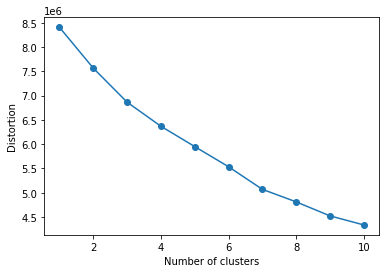

In [74]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state = 0                                                                                                                                                                                                                                                                                        
    )
    km.fit(principalDf)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### Perform Regression Analysis 


In [ ]:
df.columns

In [75]:
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
features = ['age', 'alcohol', 'country', 'bmi', 'smoking', 
       'contacts_count', 'house_count', 'text_working','compromised_immune',
       'rate_government_action',
       'rate_reducing_mask', 'covid19_positive','heart_disease', 'lung_disease', 'diabetes',
       'covid19_symptoms', 'covid19_contact',
       'other_chronic', 'opinion_infection','drugs_use']

feature_dict = {i:label for i,label in zip(
                range(11),
                  ('age', 'alcohol', 'country', 'bmi', 'smoking', 
       'contacts_count', 'house_count', 'text_working','compromised_immune',
       'rate_government_action',
       'rate_reducing_mask', 'covid19_positive','heart_disease', 'lung_disease', 'diabetes',
       'covid19_symptoms', 'covid19_contact',
       'other_chronic', 'opinion_infection','drugs_use'))}
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df['risk_infection'].values
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'Low', 2: 'Medium', 3:'High'}

In [76]:
## Linear Discriminannt Analysis 

np.set_printoptions(precision=4)

mean_vectors = []
for cl in range(1,4):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector class 1: [-0.1908 -0.0219  0.1023  0.0731  0.1106  1.2423  0.3706  0.698  -0.0233
  0.0465 -0.1893  0.0927 -0.0242 -0.0218 -0.0182  0.144   0.3369 -0.0277
  0.2875  0.0466]

Mean Vector class 2: [ 0.3035  0.0303 -0.1459 -0.0758 -0.1007 -0.8269 -0.6117 -0.5718  0.0408
  0.0739  0.4534 -0.0401  0.0534  0.046   0.0437 -0.1248 -0.1914  0.0555
 -0.1833 -0.0227]

Mean Vector class 3: [-1.9746e-02 -1.7707e-04  2.8240e-03 -1.1177e-02 -2.3405e-02 -4.0399e-01
  4.8687e-02 -1.7732e-01 -4.1275e-03 -6.3727e-02 -9.0222e-02 -4.0133e-02
 -9.3963e-03 -7.4861e-03 -8.7343e-03 -3.3421e-02 -1.2478e-01 -8.2032e-03
 -9.7284e-02 -1.9031e-02]



In [78]:
S_W = np.zeros((20,20))
for cl,mv in zip(range(1,20), mean_vectors):
    class_sc_mat = np.zeros((20,20))                # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(20,1), mv.reshape(20,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[ 6.6125e+05  5.4836e+04  1.7821e+04  4.6379e+04  1.0756e+04 -8.5146e+03
  -5.6648e+04 -3.3445e+04  2.7818e+04 -3.6138e+04  6.9357e+04  1.0206e+04
   1.1180e+05  9.0215e+04  1.1961e+05 -6.6431e+03 -2.6991e+03  4.2320e+04
  -1.1395e+04 -4.0409e+04]
 [ 5.4836e+04  6.8256e+05 -1.9438e+04 -8.3389e+04  5.3893e+04  3.6859e+03
  -3.5522e+04  1.7811e+04 -3.3883e+04 -8.2764e+03 -2.6841e+04 -2.0904e+03
  -8.5797e+03 -8.9103e+03 -4.7826e+04 -1.9434e+03  6.4706e+03 -3.6315e+04
   1.8718e+04  8.9447e+04]
 [ 1.7821e+04 -1.9438e+04  6.7742e+05  7.5075e+04 -2.2634e+03 -2.5012e+03
   1.0614e+04  6.3180e+03  1.9197e+04  3.8426e+04  2.2261e+04 -6.7352e+03
   2.4128e+03  7.0405e+03  1.8869e+04 -1.2621e+04 -7.0490e+03  7.6601e+03
  -5.9022e+03 -4.9146e+03]
 [ 4.6379e+04 -8.3389e+04  7.5075e+04  6.8078e+05  4.1291e+03  5.0527e+03
   9.5510e+03 -8.7593e+02  2.9694e+04  4.7839e+03 -4.8240e+03  7.9763e+01
   2.2097e+04  1.2319e+04  1.1405e+05  4.7786e+02 -1.1611e+04  3.4771e+04
 

In [80]:
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((20,20))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(20,1) # make column vector
    overall_mean = overall_mean.reshape(20,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[ 2.1544e+04  2.2483e+03 -1.0730e+04 -6.2796e+03 -8.8164e+03 -8.4198e+04
  -4.2925e+04 -5.2538e+04  2.8159e+03  1.9642e+03  2.8802e+04 -5.2297e+03
   3.4619e+03  3.0132e+03  2.7773e+03 -1.1172e+04 -2.1233e+04  3.6841e+03
  -1.9091e+04 -2.7503e+03]
 [ 2.2483e+03  2.3686e+02 -1.1281e+03 -6.7539e+02 -9.5737e+02 -9.3570e+03
  -4.4684e+03 -5.7500e+03  2.9203e+02  1.3158e+02  2.9300e+03 -5.9901e+02
   3.5389e+02  3.0885e+02  2.8249e+02 -1.2176e+03 -2.3867e+03  3.7874e+02
  -2.1284e+03 -3.1256e+02]
 [-1.0730e+04 -1.1281e+03  5.3750e+03  3.2022e+03  4.5298e+03  4.4057e+04
   2.1337e+04  2.7161e+04 -1.3956e+03 -7.0507e+02 -1.4063e+04  2.8028e+03
  -1.6967e+03 -1.4799e+03 -1.3559e+03  5.7565e+03  1.1211e+04 -1.8136e+03
   1.0015e+04  1.4649e+03]
 [-6.2796e+03 -6.7539e+02  3.2022e+03  2.0108e+03  2.9053e+03  2.9669e+04
   1.2412e+04  1.7716e+04 -8.0428e+02  8.7347e+01 -7.7150e+03  2.0031e+03
  -9.4274e+02 -8.2794e+02 -7.4356e+02  3.7215e+03  7.7257e+03 -1.0224e+03


In [81]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(20,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[-0.0016]
 [-0.0101]
 [ 0.0337]
 [ 0.0025]
 [ 0.0193]
 [ 0.9413]
 [ 0.2054]
 [ 0.158 ]
 [ 0.0032]
 [-0.0072]
 [-0.1495]
 [ 0.0603]
 [ 0.0036]
 [ 0.0037]
 [ 0.0014]
 [ 0.0937]
 [ 0.1004]
 [ 0.0024]
 [ 0.0136]
 [-0.004 ]]
Eigenvalue 1: 3.01e+00

Eigenvector 2: 
[[-9.4618e-01]
 [ 3.6849e-04]
 [-4.4425e-02]
 [-7.2552e-03]
 [-1.1866e-02]
 [ 1.7405e-02]
 [-2.2881e-01]
 [-9.8505e-02]
 [ 1.2253e-03]
 [ 6.2335e-02]
 [ 1.8741e-01]
 [ 5.2564e-03]
 [ 3.3457e-03]
 [ 3.9393e-04]
 [ 1.8299e-03]
 [-2.6900e-02]
 [-6.5588e-03]
 [ 3.8627e-03]
 [-1.5287e-02]
 [ 1.2472e-02]]
Eigenvalue 2: -3.22e-17

Eigenvector 3: 
[[-0.1498]
 [ 0.0037]
 [ 0.1199]
 [ 0.021 ]
 [ 0.0271]
 [-0.5033]
 [ 0.6023]
 [ 0.226 ]
 [-0.0053]
 [-0.1874]
 [-0.5023]
 [-0.0449]
 [-0.012 ]
 [-0.003 ]
 [-0.0063]
 [ 0.0376]
 [-0.0279]
 [-0.0129]
 [ 0.0403]
 [-0.0363]]
Eigenvalue 3: 9.45e-02

Eigenvector 4: 
[[ 1.5623e-01]
 [-1.7459e-01]
 [-1.3797e-01]
 [ 7.9030e-03]
 [ 1.3863e-02]
 [-4.5934e-01]
 [ 9.8158e-02]
 [ 7.3830e-01]

In [82]:
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(20,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
print('ok')

ok


In [83]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

3.009224485873292
0.0944793726249044
1.735029823135765e-16
6.184392843933673e-17
6.184392843933673e-17
3.216408721619917e-17
2.1605112921532583e-17
2.1605112921532583e-17
1.389436826748176e-17
1.053321921151879e-17
6.584426106169518e-18
6.584426106169518e-18
2.4883762077805975e-18
2.4883762077805975e-18
2.0852022050227287e-18
1.9598981355707945e-18
6.440456150936434e-19
6.440456150936434e-19
1.8333881965881198e-19
1.1783200121841747e-19


In [84]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 96.96%
eigenvalue 2: 3.04%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%
eigenvalue 5: 0.00%
eigenvalue 6: 0.00%
eigenvalue 7: 0.00%
eigenvalue 8: 0.00%
eigenvalue 9: 0.00%
eigenvalue 10: 0.00%
eigenvalue 11: 0.00%
eigenvalue 12: 0.00%
eigenvalue 13: 0.00%
eigenvalue 14: 0.00%
eigenvalue 15: 0.00%
eigenvalue 16: 0.00%
eigenvalue 17: 0.00%
eigenvalue 18: 0.00%
eigenvalue 19: 0.00%
eigenvalue 20: 0.00%


In [85]:
W = np.hstack((eig_pairs[0][1].reshape(20,1), eig_pairs[1][1].reshape(20,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[-0.0016 -0.1498]
 [-0.0101  0.0037]
 [ 0.0337  0.1199]
 [ 0.0025  0.021 ]
 [ 0.0193  0.0271]
 [ 0.9413 -0.5033]
 [ 0.2054  0.6023]
 [ 0.158   0.226 ]
 [ 0.0032 -0.0053]
 [-0.0072 -0.1874]
 [-0.1495 -0.5023]
 [ 0.0603 -0.0449]
 [ 0.0036 -0.012 ]
 [ 0.0037 -0.003 ]
 [ 0.0014 -0.0063]
 [ 0.0937  0.0376]
 [ 0.1004 -0.0279]
 [ 0.0024 -0.0129]
 [ 0.0136  0.0403]
 [-0.004  -0.0363]]


In [86]:
X_lda = X.dot(W)
X_lda.shape

(682793, 2)

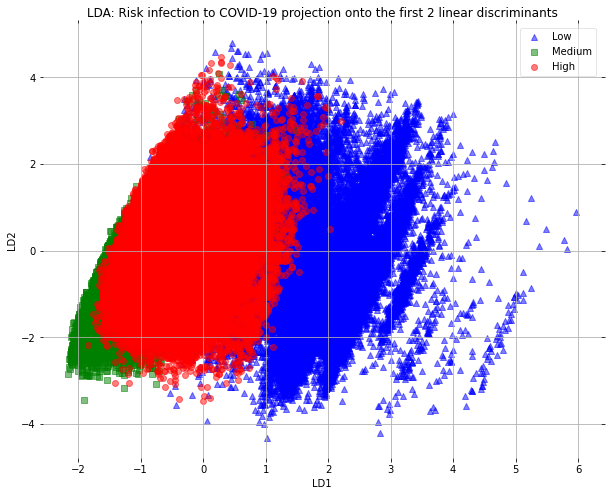

In [87]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(figsize=(10,8))
def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'green', 'red')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Risk infection to COVID-19 projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()

#### Peform regression Analysis 

In [127]:
# Getting the dataset
df = pd.read_csv("master_dataset.csv")

In [128]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

df['smoking'] = df['smoking'].fillna(df['smoking'].mode()[0])

df['text_working'] = df['text_working'].fillna(df['text_working'].mode()[0])

# Filling Missing observations in Continuous variables in the dataset:
df['rate_reducing_mask'].fillna(df['rate_reducing_mask'].mean(), inplace=True)
#df['bmi'].fillna(df['bmi'].mean(), inplace=True)

df['alcohol'].fillna(df['alcohol'].mean(), inplace=True)
df['cannabis'].fillna(df['cannabis'].mean(), inplace=True)
df['amphetamines'].fillna(df['amphetamines'].mean(), inplace=True)
df['lsd'].fillna(df['lsd'].mean(), inplace=True)
df['mdma'].fillna(df['mdma'].mean(), inplace=True)
df['cocaine'].fillna(df['cocaine'].mean(), inplace=True)
df['contacts_count'].fillna(df['contacts_count'].mean(), inplace=True)
df['lung_disease'].fillna(df['lung_disease'].mean(), inplace=True)
df['diabetes'].fillna(df['diabetes'].mean(), inplace=True)
df['hiv_positive'].fillna(df['hiv_positive'].mean(), inplace=True)
df['hypertension'].fillna(df['hypertension'].mean(), inplace=True)
df['other_chronic'].fillna(df['other_chronic'].mean(), inplace=True)
df['opinion_infection'].fillna(df['opinion_infection'].mean(), inplace=True)
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

df['opinion_mortality'].fillna(df['opinion_mortality'].mean(), inplace=True)
df['risk_infection'].fillna(df['risk_infection'].mean(), inplace=True)
df['risk_mortality'].fillna(df['risk_mortality'].mean(), inplace=True)
df['heart_disease'].fillna(df['heart_disease'].mean(), inplace=True)

In [129]:
column2drop = ['region', 'prescription_medication', 'opinion_mortality', 'risk_mortality']
df.drop(column2drop, axis=1, inplace=True)

In [130]:
from sklearn.preprocessing import StandardScaler
df[['cannabis', 'cocaine', 'amphetamines', 'lsd', 'mdma']] = StandardScaler().fit_transform(df[['cannabis', 'cocaine', 'amphetamines', 'lsd', 'mdma']])

In [131]:
col = df.loc[: , 'cannabis':'mdma']
df['drugs_use'] = col.mean(axis=1)

In [132]:
df.rate_government_action[df.rate_government_action == -2] = "SD"
df.rate_government_action[df.rate_government_action == -1] = "D"
df.rate_government_action[df.rate_government_action == 0] = "N"
df.rate_government_action[df.rate_government_action == 1] = "A"
df.rate_government_action[df.rate_government_action == 2] = "SA"

df.rate_reducing_risk_house[df.rate_reducing_risk_house == -2] = "SD"
df.rate_reducing_risk_house[df.rate_reducing_risk_house == -1] = "D"
df.rate_reducing_risk_house[df.rate_reducing_risk_house == 0] = "N"
df.rate_reducing_risk_house[df.rate_reducing_risk_house == 1] = "A"
df.rate_reducing_risk_house[df.rate_reducing_risk_house == 2] = "SA"

df.rate_reducing_risk_single[df.rate_reducing_risk_single == -2] = "SD"
df.rate_reducing_risk_single[df.rate_reducing_risk_single == -1] = "D"
df.rate_reducing_risk_single[df.rate_reducing_risk_single == 0] = "N"
df.rate_reducing_risk_single[df.rate_reducing_risk_single == 1] = "A"
df.rate_reducing_risk_single[df.rate_reducing_risk_single == 2] = "SA"

#df['bmi'] = pd.cut(df.bmi,bins=[0,18.5,24.9,29.9,39.9,145],labels=['Underweight','Healthy weight','Overweight','Obese',
                                                                 #'Class 3 Obese'])

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [133]:
from sklearn.preprocessing import LabelEncoder
label_encoders = dict()
column2encode = ['sex', 'age', 'country','blood_type', 'smoking', 
                'text_working', 'rate_government_action', 'rate_reducing_risk_single', 
                'rate_reducing_risk_house'] #'risk_infection']

for col in column2encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [134]:
df.columns

Index(['country', 'sex', 'age', 'bmi', 'blood_type', 'smoking', 'alcohol', 'cannabis',
       'amphetamines', 'cocaine', 'lsd', 'mdma', 'contacts_count', 'house_count', 'text_working',
       'rate_government_action', 'rate_reducing_risk_single', 'rate_reducing_risk_house',
       'rate_reducing_mask', 'covid19_positive', 'covid19_symptoms', 'covid19_contact', 'asthma',
       'kidney_disease', 'compromised_immune', 'heart_disease', 'lung_disease', 'diabetes',
       'hiv_positive', 'hypertension', 'other_chronic', 'opinion_infection', 'risk_infection',
       'drugs_use'],
      dtype='object')

In [135]:
features = ['smoking', 'contacts_count', 'rate_government_action', 'rate_reducing_risk_house', 
                         'rate_reducing_mask', 'covid19_positive', 'covid19_symptoms', 'covid19_contact', 
                         'asthma', 'other_chronic', 'drugs_use']

#split the dataset into train and test set
# Separating out the features
X = df[features]
# Separating out the target
y = df[['risk_infection']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

X_train = X_train[features].as_matrix()
y_train = y_train['risk_infection'].as_matrix()
X_test = X_test[features].as_matrix()
y_test = y_test['risk_infection'].as_matrix()


C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


Features : ['smoking', 'contacts_count', 'rate_government_action', 'rate_reducing_risk_house', 'rate_reducing_mask', 'covid19_positive', 'covid19_symptoms', 'covid19_contact', 'asthma', 'other_chronic', 'drugs_use']
R2 score : 0.8326737710176244
Intercept: 39.98092127597037
Coefficients: [ 0.2355  3.0847 -0.1222 -0.9971 -2.966  36.0595 14.438  10.393   0.1976
 -0.3113 -0.1788]


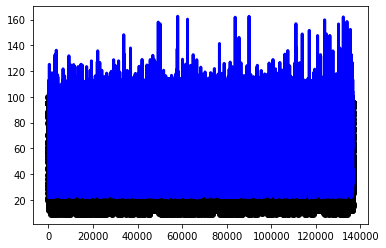

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Create linear regression object
regr = LinearRegression()
# Train the model using the training sets
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
plt.scatter(range(len(y_test)), y_test, color='black')
plt.plot(y_pred, color='blue', linewidth=3)
print('Features : %s' % str(features))
print('R2 score : %s' % r2_score(y_test, y_pred))
print('Intercept: %s' % regr.intercept_)
print('Coefficients: %s' % str(regr.coef_))

In [137]:
### Calculating Multiple Ridge Regression
from sklearn.preprocessing import StandardScaler
idx = df.loc[:, features].values
coef = (-1) ** idx * np.exp(-idx / 10)
coef[10:] = 0  # sparsify coef
# Standardizing the features
X_train = StandardScaler().fit_transform(X_train)
# Standardizing the features
X_test = StandardScaler().fit_transform(X_test)


C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.


In [138]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
alpha = 1
ridge = Ridge(alpha=alpha)
y_pred_ridge = ridge.fit(X_train, y_train).predict(X_test)
r2_score_ridge = r2_score(y_test, y_pred_ridge)
print(ridge)
print("r^2 on test data : %f" % r2_score_ridge)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
r^2 on test data : 0.832644


In [139]:
### Calculating Multiple Lasso Regression
from sklearn.linear_model import Lasso
alpha = 1
lasso = Lasso(alpha=alpha)
y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)
r^2 on test data : 0.821880


In [140]:
### Calculating Multiple ElasticNet Regression
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.775765


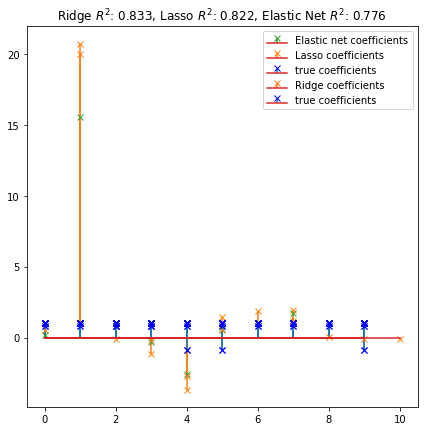

In [141]:
plt.figure(figsize=(7,7))
m, s, _ = plt.stem(np.where(enet.coef_)[0], enet.coef_[enet.coef_ != 0],
                   markerfmt='x', label='Elastic net coefficients',
                   use_line_collection=True)
plt.setp([m, s], color="#2ca02c")
m, s, _ = plt.stem(np.where(lasso.coef_)[0], lasso.coef_[lasso.coef_ != 0],
                   markerfmt='x', label='Lasso coefficients',
                   use_line_collection=True)
plt.setp([m, s], color='#ff7f0e')
plt.stem(np.where(coef)[0], coef[coef != 0], label='true coefficients',
         markerfmt='bx', use_line_collection=True)

m, s, _ = plt.stem(np.where(ridge.coef_)[0], ridge.coef_[ridge.coef_ != 0],
                   markerfmt='x', label='Ridge coefficients',
                   use_line_collection=True)
plt.setp([m, s], color='#ff7f0e')
plt.stem(np.where(coef)[0], coef[coef != 0], label='true coefficients',
         markerfmt='bx', use_line_collection=True)
plt.legend(loc='best')
plt.title("Ridge $R^2$: %.3f, Lasso $R^2$: %.3f, Elastic Net $R^2$: %.3f"
          % (r2_score_ridge, r2_score_lasso, r2_score_enet))
plt.show()

In [142]:
#training the model
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

lreg.fit(X_train,y_train)

#predicting on test set

pred = lreg.predict(X_test)

#calculating mse

mse = np.mean((pred - y_test)**2)

In [143]:
# calculating coefficients
from pandas import DataFrame
import pandas as pd

coeff = pd.DataFrame({'Features':['smoking', 'contacts_count', 'rate_government_action', 'rate_reducing_risk_house', 
                         'rate_reducing_mask', 'covid19_positive', 'covid19_symptoms', 'covid19_contact', 
                         'asthma', 'other_chronic', 'drugs_use']})

coeff['Coefficient Estimate'] = pd.Series(lreg.coef_)

coeff

,Features,Coefficient Estimate
0,smoking,0.560
1,contacts_count,20.730
2,rate_government_action,-0.129
3,rate_reducing_risk_house,-1.153
4,rate_reducing_mask,-3.663
5,covid19_positive,1.436
6,covid19_symptoms,1.838
7,covid19_contact,1.950
8,asthma,0.072
9,other_chronic,-0.082


#### Evaluating Regression Model parameters – R square and adjusted R- square

In [144]:
lreg.score(X_test,y_test)

0.8326436944380294

Text(0.5, 1.0, 'Residual plot')

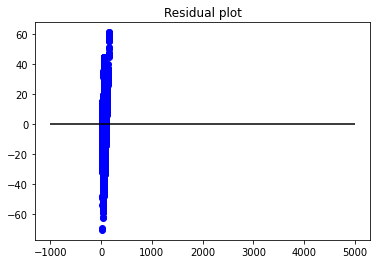

In [145]:
#residual plot

x_plot = plt.scatter(pred, (pred - y_test), c='b')

plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')

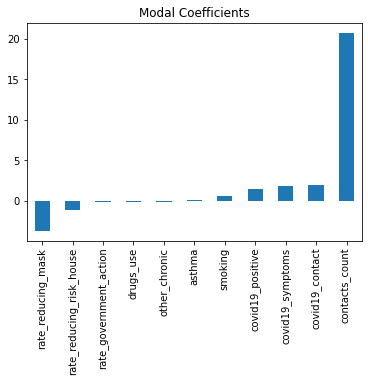

In [146]:
#checking the magnitude of coefficients

predictors = ['smoking', 'contacts_count', 'rate_government_action', 'rate_reducing_risk_house', 
                         'rate_reducing_mask', 'covid19_positive', 'covid19_symptoms', 'covid19_contact', 
                         'asthma', 'other_chronic', 'drugs_use']

coef = pd.Series(lreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

In [147]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_train,y_train)

pred = ridgeReg.predict(X_test)

#calculating mse

mse = np.mean((pred - y_test)**2)
mse

99.04468167885578

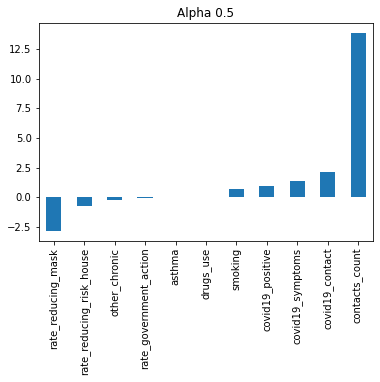

In [148]:
ridgeReg = Ridge(alpha=0.5, normalize=True)

ridgeReg.fit(X_train,y_train)

pred = ridgeReg.predict(X_test)

#calculating mse

mse = np.mean((pred - y_test)**2)
mse
predictors = ['smoking', 'contacts_count', 'rate_government_action', 'rate_reducing_risk_house', 
                         'rate_reducing_mask', 'covid19_positive', 'covid19_symptoms', 'covid19_contact', 
                         'asthma', 'other_chronic', 'drugs_use']

coef = pd.Series(ridgeReg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Alpha 0.5')

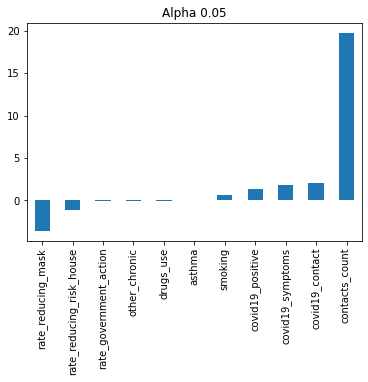

In [149]:
ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_train,y_train)

pred = ridgeReg.predict(X_test)

#calculating mse

mse = np.mean((pred - y_test)**2)
mse
predictors = ['smoking', 'contacts_count', 'rate_government_action', 'rate_reducing_risk_house', 
                         'rate_reducing_mask', 'covid19_positive', 'covid19_symptoms', 'covid19_contact', 
                         'asthma', 'other_chronic', 'drugs_use']

coef = pd.Series(ridgeReg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Alpha 0.05')

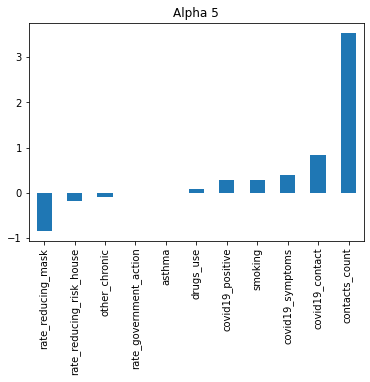

In [150]:
ridgeReg = Ridge(alpha=5, normalize=True)

ridgeReg.fit(X_train,y_train)

pred = ridgeReg.predict(X_test)

#calculating mse

mse = np.mean((pred - y_test)**2)
mse
predictors = ['smoking', 'contacts_count', 'rate_government_action', 'rate_reducing_risk_house', 
                         'rate_reducing_mask', 'covid19_positive', 'covid19_symptoms', 'covid19_contact', 
                         'asthma', 'other_chronic', 'drugs_use']

coef = pd.Series(ridgeReg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Alpha 5')

In [151]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.005, normalize=True)

lassoReg.fit(X_train,y_train)

pred = lassoReg.predict(X_test)

# calculating mse

mse = np.mean((pred - y_test)**2)

mse

136.63396704015935

In [152]:
lassoReg.score(X_test,y_test)

0.7664176975605286

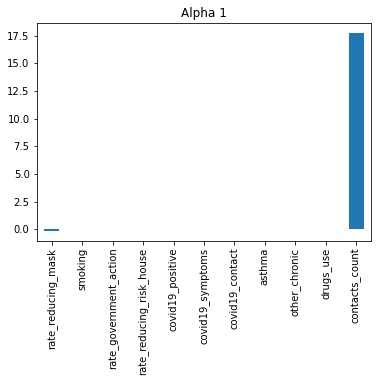

In [155]:
lassoReg = Lasso(alpha=0.005, normalize=True)

lassoReg.fit(X_train,y_train)

pred = lassoReg.predict(X_test)

#calculating mse

mse = np.mean((pred - y_test)**2)
mse
predictors = ['smoking', 'contacts_count', 'rate_government_action', 'rate_reducing_risk_house', 
                         'rate_reducing_mask', 'covid19_positive', 'covid19_symptoms', 'covid19_contact', 
                         'asthma', 'other_chronic', 'drugs_use']

coef = pd.Series(lassoReg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Alpha 0.005')

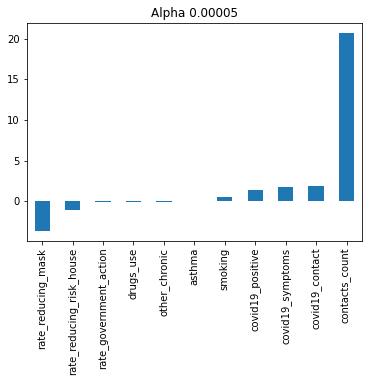

In [156]:
lassoReg = Lasso(alpha= 0.00005, normalize=True)

lassoReg.fit(X_train,y_train)

pred = lassoReg.predict(X_test)

#calculating mse

mse = np.mean((pred - y_test)**2)
mse
predictors = ['smoking', 'contacts_count', 'rate_government_action', 'rate_reducing_risk_house', 
                         'rate_reducing_mask', 'covid19_positive', 'covid19_symptoms', 'covid19_contact', 
                         'asthma', 'other_chronic', 'drugs_use']

coef = pd.Series(lassoReg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Alpha 0.00005')

In [ ]:
df['risk_infection'] = pd.cut(df.risk_infection,bins=[0,34,67,100],labels=['Low','Medium','High'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.risk_infection

In [ ]:
label_encoders = dict()
column2encode = ['risk_infection']

for col in column2encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


# Import some data to play with
X = df[features]
y = df.risk_infection

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=123))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()